<br><center> **Extra Assignment 1** <br><center>
**2300715 - Saad Joiya**

## Extracting Diabetes Data and Model Fitting

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed

In [2]:
# Load the Pima Indians Diabetes Dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
data = pd.read_csv(url)


# We use Glucose as the explanatory and Outcome (Diabetes or not) as the target variable
X = data[['Glucose']].values
y = data['Outcome'].values

In [3]:
#Checking correlation between variables
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# Model Fitting and Bias-Variance Decomposition for 100 simulations and test size 30%
def bias_variance_decomposition(degrees, n_simulations=100, test_size=0.3, n_jobs=-1):
    def run_simulation(degree):
        predictions = []

        for _ in range(n_simulations):
            # Randomized train-test split for each iteration
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

            # Polynomial transformation
            poly = PolynomialFeatures(degree)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)

            # Linear regression model
            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            # Predictions on the test set
            y_pred = model.predict(X_test_poly)
            predictions.append(y_pred)

        # Convert predictions to NumPy array
        predictions = np.array(predictions)
        mean_prediction = predictions.mean(axis=0)

        # Calculating Bias²: difference between mean prediction and true values
        bias_squared = np.mean((mean_prediction - y_test) ** 2)

        # Calculating Variance: variability of predictions across simulations
        variance = np.mean(np.var(predictions, axis=0))

        # MSE: Bias² + Variance
        mse = bias_squared + variance

        return {
            'Degree': degree,
            'MSE': mse,
            'Bias^2': bias_squared,
            'Variance': variance
        }

    # For faster compuation: Run simulations in parallel across polynomial degrees
    results = Parallel(n_jobs=n_jobs)(delayed(run_simulation)(degree) for degree in degrees)
    
    return pd.DataFrame(results)

In [25]:

#Running the Simulation for polynomial range 1 to 20
degrees = range(1, 20)
results_df = bias_variance_decomposition(degrees)
print(results_df)



    Degree       MSE    Bias^2  Variance
0        1  0.259970  0.211420  0.048550
1        2  0.290765  0.237785  0.052980
2        3  0.280768  0.224385  0.056382
3        4  0.277411  0.221405  0.056006
4        5  0.291513  0.235086  0.056427
5        6  0.280142  0.223461  0.056682
6        7  0.274233  0.217808  0.056425
7        8  0.273441  0.216593  0.056848
8        9  0.285112  0.228289  0.056824
9       10  0.287314  0.230599  0.056716
10      11  0.279413  0.222953  0.056461
11      12  0.278039  0.222428  0.055611
12      13  0.278220  0.223238  0.054981
13      14  0.287946  0.232057  0.055890
14      15  0.288342  0.233904  0.054438
15      16  0.294551  0.238297  0.056254
16      17  0.280209  0.223330  0.056879
17      18  0.300417  0.244941  0.055476
18      19  0.281107  0.226955  0.054151


In [27]:
results_df.head()

,Degree,MSE,Bias^2,Variance
0,1,0.259970,0.211420,0.048550
1,2,0.290765,0.237785,0.052980
2,3,0.280768,0.224385,0.056382
3,4,0.277411,0.221405,0.056006
4,5,0.291513,0.235086,0.056427


In [29]:
results_df.dtypes

Degree        int64
MSE         float64
Bias^2      float64
Variance    float64
dtype: object

## Plotting Bias^2 vs Variance Tradeoff

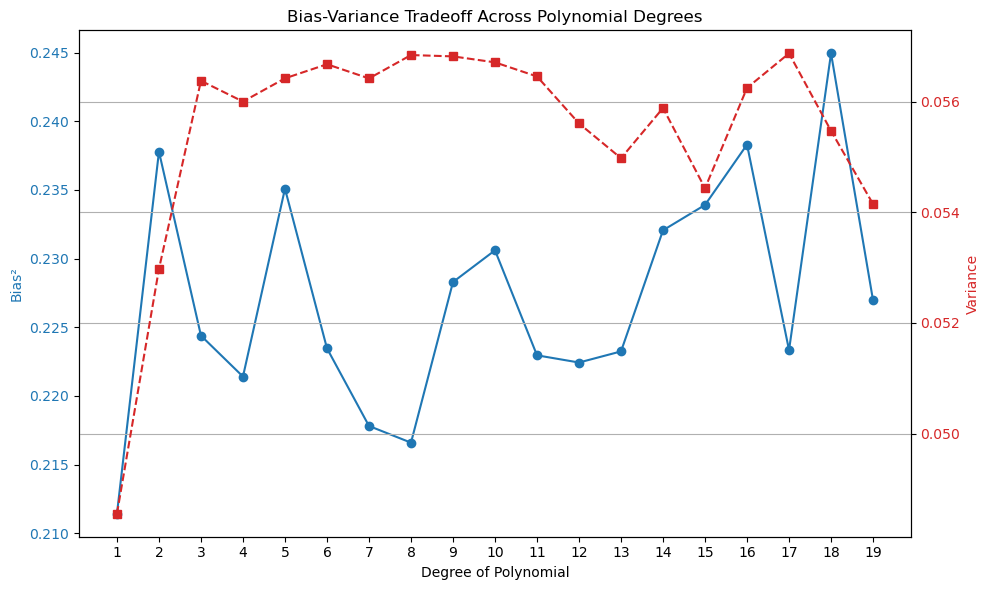

In [35]:
import matplotlib.pyplot as plt

# 4. Visualization with Dual Axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bias² on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('Bias²', color=color)
ax1.plot(results_df['Degree'], results_df['Bias^2'], label='Bias²', marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Adjust x-axis ticks to have intervals of 1
ax1.set_xticks(range(int(results_df['Degree'].min()), int(results_df['Degree'].max()) + 1, 1))

# Create a second y-axis for Variance
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Variance', color=color)
ax2.plot(results_df['Degree'], results_df['Variance'], label='Variance', marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and grid
plt.title('Bias-Variance Tradeoff Across Polynomial Degrees')
fig.tight_layout()  # Adjusts plot to fit into the figure area nicely
plt.grid(True)
plt.show()


In [33]:
print(results_df[['Degree', 'Bias^2', 'Variance']])

    Degree    Bias^2  Variance
0        1  0.211420  0.048550
1        2  0.237785  0.052980
2        3  0.224385  0.056382
3        4  0.221405  0.056006
4        5  0.235086  0.056427
5        6  0.223461  0.056682
6        7  0.217808  0.056425
7        8  0.216593  0.056848
8        9  0.228289  0.056824
9       10  0.230599  0.056716
10      11  0.222953  0.056461
11      12  0.222428  0.055611
12      13  0.223238  0.054981
13      14  0.232057  0.055890
14      15  0.233904  0.054438
15      16  0.238297  0.056254
16      17  0.223330  0.056879
17      18  0.244941  0.055476
18      19  0.226955  0.054151


In [40]:
results_df.to_csv('Bias-Variance-Results.csv')

## Creating the Streamlit App

2025-01-18 16:08:21.374 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-18 16:08:21.927 
  command:

    streamlit run C:\Users\saad\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-18 16:08:21.932 No runtime found, using MemoryCacheStorageManager


DeltaGenerator()

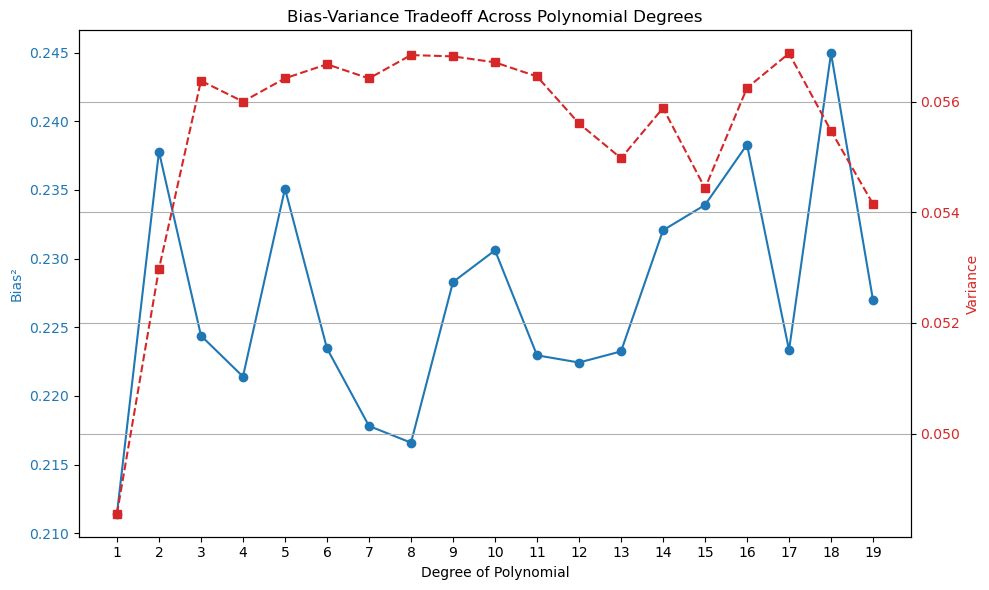

In [43]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (Entering path for my github containing output in csv format)
@st.cache_data
def load_data():
    url = "https://raw.githubusercontent.com/joiya-saad/Data-Analysis-3/refs/heads/main/Extra_Assignment_1/Bias-Variance-Results.csv"  # Replace with your CSV link
    return pd.read_csv(url)

# Load data
results_df = load_data()

# Streamlit app layout
st.title("Bias-Variance Tradeoff Visualization")

st.text("Author: Saad Joiya - 2300715")

st.text("This app is developed for the course DA3 to demonstrate tradeoff between Bias^2 and Variance")

st.header("Introduction")

st.text("The Mean Squared Error (MSE) can be broken down into two key components: \
         bias squared and variance. The bias of a model's predictions refers to the systematic error introduced \
         by approximating a real-world problem with a simplified model. In other words, it reflects how much, \
         on average, the model's predictions differ from the true values. As the output can be a result of the interplay between different variables \
          increasing the number of variables (complexity) in the model, tends to reduce Bias. \
        On the other hand, variance measures the extent to which a model’s predictions fluctuate when trained on different subsets of the data. \
         High variance indicates that the model is sensitive to small changes in the data, while low variance \
         suggests the model is more stable. Addition of extra variables (complexity) leads to higher variance as model tends to become \
        more flexible to changes. There is typically an inverse relationship between bias and variance—reducing \
         one tends to increase the other. This trade-off is crucial to understanding model performance, \
        especially when balancing underfitting (high bias) and overfitting (high variance). \
            The purpose of this application is to visually demonstrate this trade-off by applying \
                  it to a real-world prediction task. By varying the complexity of the model \
                      (e.g., adjusting the polynomial degree in regression), we can observe how bias \
                          and variance evolve, helping to visualize the impact of model choices on prediction error.")

st.header("Data Description and methodology")

st.text("In order to demonstrate the relationship between Bias^2 and Variance, \
we use the Pima Indians Diabetes Dataset. This dataset has Diabetes as the target \
variable with binary values 0 (not present) and 1 (present). There are many explanatory \
variables such as BMI, Glucose, Pregnancies, BloodPressure, Insulin, Age etc. For our purpose \
we pick Glucose as the explanatory variable and use it to predict target variable Diabetes. We increase \
the complexity of the model by increasing the polynomial degree of the explanatory variable Glucose. We split the data into train \
        test by 70-30 ratio and run 100 simulations for each polynomial degree to gather the results and observe \
how the Bias^2 and Variance change respectively.")

# Slicer for Polynomial Degree
min_degree = int(results_df['Degree'].min())
max_degree = int(results_df['Degree'].max())
st.subheader("We can adjust the polynomial degree using the slider below to observe how Bias^2 and Variance change with increasing complexity")
degree_range = st.slider("Select Polynomial Degree Range", min_degree, max_degree, (min_degree, max_degree))

# Filter data based on slider
filtered_df = results_df[(results_df['Degree'] >= degree_range[0]) & (results_df['Degree'] <= degree_range[1])]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bias² plot
color = 'tab:blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('Bias²', color=color)
ax1.plot(filtered_df['Degree'], filtered_df['Bias^2'], marker='o', color=color, label='Bias²')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(degree_range[0], degree_range[1] + 1))

# Variance plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Variance', color=color)
ax2.plot(filtered_df['Degree'], filtered_df['Variance'], marker='s', linestyle='--', color=color, label='Variance')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Bias-Variance Tradeoff Across Polynomial Degrees')
fig.tight_layout()
plt.grid(True)

# Show plot
st.pyplot(fig)

st.header("Interpretation")

st.text("The chart illustrates a well-known trade-off between model complexity, bias, and variance. \
        On average, simpler models, with fewer features or lower polynomial degrees, tend to exhibit lower variance \
         but higher bias. This means they are less sensitive to the noise in the data, but they might underfit \
         by failing to capture the underlying relationships. Conversely, more complex models—characterized by \
        higher polynomial degrees or the inclusion of more variables—generally show higher variance but lower bias. \
         These models fit the training data more closely, but they risk overfitting and become sensitive to small \
         variations in the data. Selecting the optimal model involves finding a balance: the sweet spot where both \
         bias and variance are relatively low. It is also to note that in our example, we just used one explanatory \
        variable and we increased complexity by increasing the polynomial degree i.e. adding variations of the same \
        variable to add complexity. Complexity can be added by using additional variables and their polynomials as well.\
        Addition of variables would shift the optimal point for the model. Hence, the balance between Bias^2 and variance \
        depends on the number of features and their variations present in the model.")


st.header("Disclaimer")

st.text("LLMs were used to take guidance on the process of running the simulations for different polynomial degrees while \
         fitting the model. It was also leveraged to understand how to publish apps on streamlit. ")